# Librerías biologícas de Python. 

- Scikit bio
- Biopython

## Scikit bio

In [19]:
from skbio import TabularMSA, Protein, DNA

msa = TabularMSA.read('7_aligned.fasta', constructor=Protein)
msa.reassign_index(minter='id')

In [2]:
import numpy as np
from collections import defaultdict
hydrophobicity_idx = defaultdict(lambda: np.nan)
hydrophobicity_idx.update({'A': 0.61, 'L': 1.53, 'R': 0.60, 'K': 1.15, 'N': 0.06, 'M': 1.18, 
                           'D': 0.46, 'F': 2.02, 'C': 1.07, 'P': 1.95, 'Q': 0., 'S': 0.05, 
                           'E': 0.47, 'T': 0.05, 'G': 0.07, 'W': 2.65, 'H': 0.61, 'Y': 1.88, 
                           'I': 2.22, 'V': 1.32})
hydrophobicity_labels=['Hydrophilic', 'Medium', 'Hydrophobic']

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def msa_to_heatmap(msa, value_map, legend_labels=('Low', 'Medium', 'High'), fig_size=(15,10), cmap='YlGn', sequence_order=None):
    """Plot a multiple sequence alignment as a heatmap.
    
    Parameters
    ----------
    msa : skbio.TabularMSA
        The multiple sequence alignment to be plotted
    value_map : dict, collections.defaultdict
        Dictionary mapping characters in the alignment to values. KeyErrors are not
        caught, so all possible values should be in this dict, or it should be a 
        collections.defaultdict which can, for example, default to ``nan``.
    legend_labels : iterable, optional
        Labels for the min, median, and max values in the legend.
    fig_size : tuple, optional
        Size of figure in inches.
    cmap : matplotlib colormap, optional
        See here for choices: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
    sequence_order : iterable, optional
        The order, from top-to-bottom, that the sequences should be plotted in.
    
    Raises
    ------
    KeyError
        If a character in ``msa`` is not in ``value_map``, and ``value_map`` is not a 
        ``collections.defaultdict``.
        
    """
    if sequence_order is None:
        sequence_order = msa.index
            
    # fill a data matrix by iterating over the alignment and mapping
    # characters to values
    mtx = []
    for label in sequence_order:
        seq = str(msa.loc[label])
        mtx.append([value_map[aa] for aa in seq])
        
    # build the heatmap, this code derived from the Matplotlib Gallery
    # http://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)

    cax = ax.imshow(mtx, interpolation='nearest', cmap=cmap)

    # Add colorbar and define tick labels
    values = list(value_map.values())
    cbar = fig.colorbar(cax, 
                        ticks=[min(values), 
                               np.nanmedian(values),
                               max(values)],
                        orientation='horizontal')
    ax.set_yticks([0] + list(range(3, msa.shape.sequence - 3, 3)) + [msa.shape.sequence - 1])
    ax.set_yticklabels(sequence_order)
    ax.set_xticks(range(msa.shape.position))
    ax.set_xticklabels(msa.consensus(), size=7)
    cbar.ax.set_xticklabels(legend_labels) # horizontal colorbar

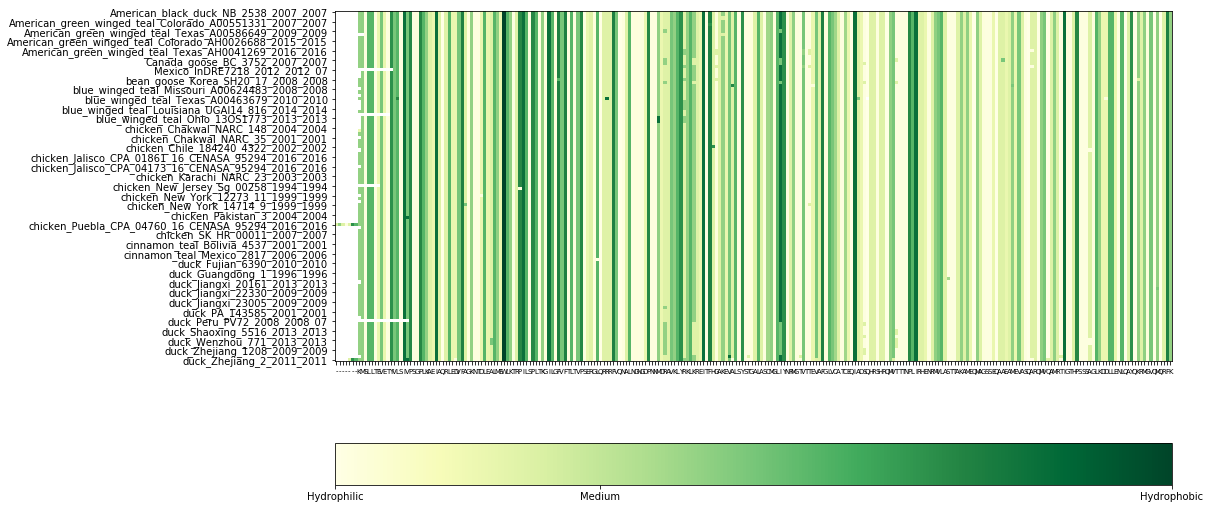

In [4]:
msa_to_heatmap(msa, hydrophobicity_idx, legend_labels=hydrophobicity_labels)

In [9]:
msa2 = TabularMSA.read('6_aligned.fasta', constructor=Protein)
msa2.reassign_index(minter='id')

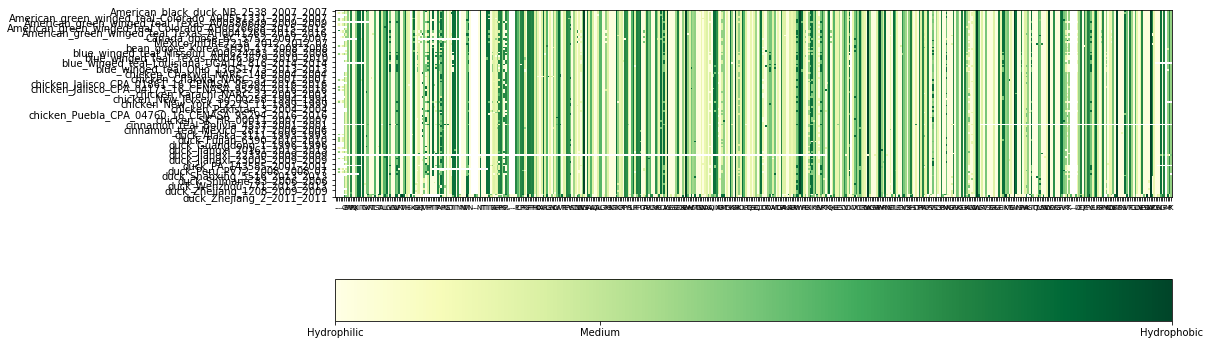

In [28]:
msa_to_heatmap(msa2, hydrophobicity_idx, legend_labels=hydrophobicity_labels)

In [11]:
msa3 = TabularMSA.read('5_aligned.fasta', constructor=Protein)
msa3.reassign_index(minter='id')

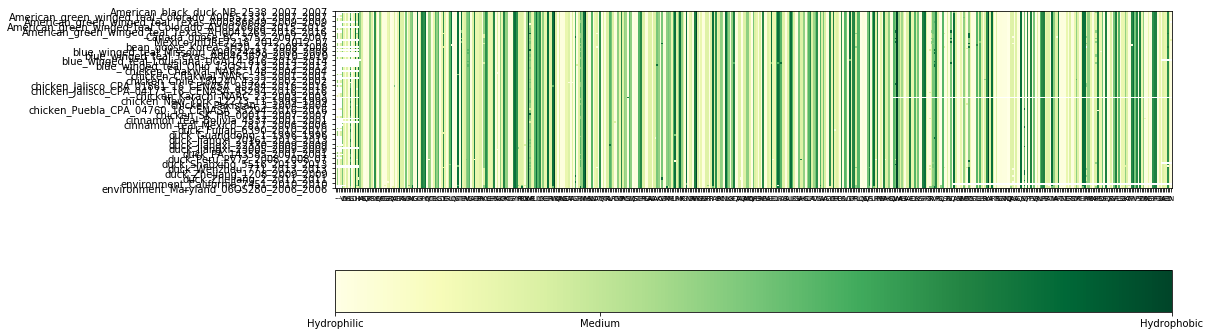

In [12]:
msa_to_heatmap(msa3, hydrophobicity_idx, legend_labels=hydrophobicity_labels)hydrophobicity

In [13]:
bases_idx = defaultdict(lambda: np.nan)
bases_idx.update({'A': 1, 'C': 0.25, 'G': 0.5, 'T': 0.75, '-': 0})

In [41]:
def msa2_to_heatmap(msa, value_map, fig_size=(15,10), cmap='YlGn', sequence_order=None):
    
    if sequence_order is None:
        sequence_order = msa.index
            
    mtx = []
    for label in sequence_order:
        seq = str(msa.loc[label])
        mtx.append([value_map[aa] for aa in seq])
    
    #fig_size[0] = 21
    #fig_size[1] = 18
    #plt.rcParams["figure.figsize"] = fig_size
    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)

    cax = ax.imshow(mtx, interpolation='nearest', cmap=cmap)

    # Add colorbar and define tick labels
    values = list(value_map.values())
    cbar = fig.colorbar(cax, 
                        ticks=[min(values), 
                               np.nanmedian(values),
                               max(values)],
                        orientation='horizontal')
    ax.set_yticks([0] + list(range(3, msa.shape.sequence - 3, 3)) + [msa.shape.sequence - 1])
    ax.set_yticklabels(sequence_order)
    ax.set_xticks(range(msa.shape.position))
    ax.set_xticklabels(msa.consensus(), size=7)

In [21]:
msa4 = TabularMSA.read('ITS_copy1_aln2.fa', constructor = DNA)
msa4.reassign_index(minter='id')

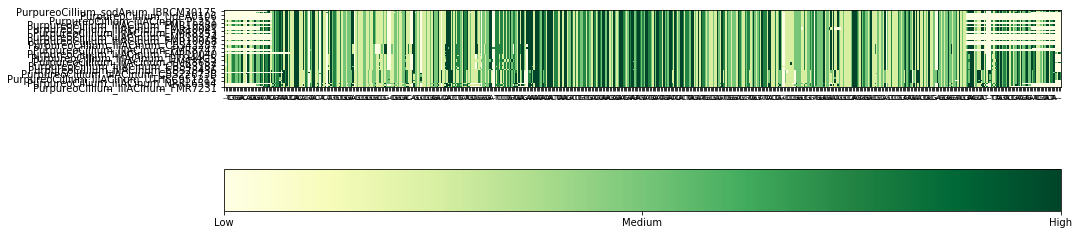

In [42]:
msa_to_heatmap(msa4, bases_idx)

## Biopython

In [44]:
from Bio import SeqIO

In [46]:
for seq_record in SeqIO.parse('5_aligned.fasta', "fasta"):
    print(seq_record.id)

American_black_duck_NB_2538_2007_2007
American_green_winged_teal_Colorado_A00551331_2007_2007
American_green_winged_teal_Texas_A00586649_2009_2009
American_green_winged_teal_Colorado_AH0026688_2015_2015
American_green_winged_teal_Texas_AH0041269_2016_2016
Canada_goose_BC_3752_2007_2007
Mexico_InDRE7218_2012_2012_07
bean_goose_Korea_SH20_17_2008_2008
blue_winged_teal_Missouri_A00624483_2008_2008
blue_winged_teal_Texas_A00463679_2010_2010
blue_winged_teal_Louisiana_UGAI14_816_2014_2014
blue_winged_teal_Ohio_13OS1773_2013_2013
chicken_Chakwal_NARC_148_2004_2004
chicken_Chakwal_NARC_35_2001_2001
chicken_Chile_184240_4322_2002_2002
chicken_Jalisco_CPA_01861_16_CENASA_95294_2016_2016
chicken_Jalisco_CPA_04173_16_CENASA_95294_2016_2016
chicken_Karachi_NARC_23_2003_2003
chicken_New_York_12273_11_1999_1999
chicken_Pakistan_3_2004_2004
chicken_Puebla_CPA_04760_16_CENASA_95294_2016_2016
chicken_SK_HR_00011_2007_2007
cinnamon_teal_Bolivia_4537_2001_2001
cinnamon_teal_Mexico_2817_2006_2006
duck_Fuj

In [49]:
for seq_record in SeqIO.parse('5_aligned.fasta', "fasta"):
    print(seq_record)

ID: American_black_duck_NB_2538_2007_2007
Name: American_black_duck_NB_2538_2007_2007
Description: American_black_duck_NB_2538_2007_2007
Number of features: 0
Seq('--SRVDNHSPSDIHIMASQGTKRSYEQMETGGERQNATEIRASVGRMVGGIGRF...YDN', SingleLetterAlphabet())
ID: American_green_winged_teal_Colorado_A00551331_2007_2007
Name: American_green_winged_teal_Colorado_A00551331_2007_2007
Description: American_green_winged_teal_Colorado_A00551331_2007_2007
Number of features: 0
Seq('---------------MASQGTKRSYEQMETGGERQNATEIRASVGRMVGGIGRF...YDN', SingleLetterAlphabet())
ID: American_green_winged_teal_Texas_A00586649_2009_2009
Name: American_green_winged_teal_Texas_A00586649_2009_2009
Description: American_green_winged_teal_Texas_A00586649_2009_2009
Number of features: 0
Seq('----VDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASVGRMVGGIGRF...YDN', SingleLetterAlphabet())
ID: American_green_winged_teal_Colorado_AH0026688_2015_2015
Name: American_green_winged_teal_Colorado_AH0026688_2015_2015
Description: American_gree

In [48]:
from Bio import AlignIO
alignment = AlignIO.read("5_aligned.fasta", "fasta")
print(alignment)

SingleLetterAlphabet() alignment with 109 rows and 513 columns
--SRVDNHSPSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN American_black_duck_NB_2538_2007_2007
---------------MASQGTKRSYEQMETGGERQNATEIRASV...YDN American_green_winged_teal_Colorado_A00551331_2007_2007
----VDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN American_green_winged_teal_Texas_A00586649_2009_2009
--SRVDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN American_green_winged_teal_Colorado_AH0026688_2015_2015
----VDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN American_green_winged_teal_Texas_AH0041269_2016_2016
SKSRVDNHSPSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN Canada_goose_BC_3752_2007_2007
SKSRVDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN Mexico_InDRE7218_2012_2012_07
------------INIMASQGTKRSYEQMETGGERQNATEIRASV...YD- bean_goose_Korea_SH20_17_2008_2008
----VDNHSLSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN blue_winged_teal_Missouri_A00624483_2008_2008
----VDNHSPSDIHIMASQGTKRSYEQMETGGERQNATEIRASV...YDN blue_winged_teal_Texas_A00463